In [61]:
import pandas as pd
train_df = pd.read_csv("D:/datathon/academy2025/train.csv")
print(train_df.info())
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB
None
       ürün besin değeri    ürün fiyatı
count      227520.000000  227520.000000
mean          143.113924      17.018837
std           133.218871      14.470524
min             8.000000       0.740000
25%            41.000000       7.380000
50%            83.000000      12.860000
75%           250.000000      21.630000
max         

In [62]:
test_df= pd.read_csv("D:/datathon/academy2025/testFeatures.csv")

In [63]:
train_df["tarih"] = pd.to_datetime(train_df["tarih"])
train_df["yıl"] = train_df["tarih"].dt.year
train_df["ay"] = train_df["tarih"].dt.month
train_df["hafta"] = train_df["tarih"].dt.isocalendar().week


In [68]:
test_df["tarih"] = pd.to_datetime(test_df["tarih"])
test_df["yıl"] = test_df["tarih"].dt.year
test_df["ay"] = test_df["tarih"].dt.month
test_df["hafta"] = test_df["tarih"].dt.isocalendar().week


In [65]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["ürün", "ürün kategorisi", "ürün üretim yeri", "market", "şehir"]
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    encoders[col] = le


In [69]:
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

In [70]:
print(missing_train)
print(missing_test)

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
yıl                  0
ay                   0
hafta                0
dtype: int64
id                   0
tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
yıl                  0
ay                   0
hafta                0
dtype: int64


In [71]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tarih              227520 non-null  datetime64[ns]
 1   ürün               227520 non-null  int64         
 2   ürün besin değeri  227520 non-null  int64         
 3   ürün kategorisi    227520 non-null  int64         
 4   ürün fiyatı        227520 non-null  float64       
 5   ürün üretim yeri   227520 non-null  int64         
 6   market             227520 non-null  int64         
 7   şehir              227520 non-null  int64         
 8   yıl                227520 non-null  int32         
 9   ay                 227520 non-null  int32         
 10  hafta              227520 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), int64(6)
memory usage: 16.7 MB
None


eda

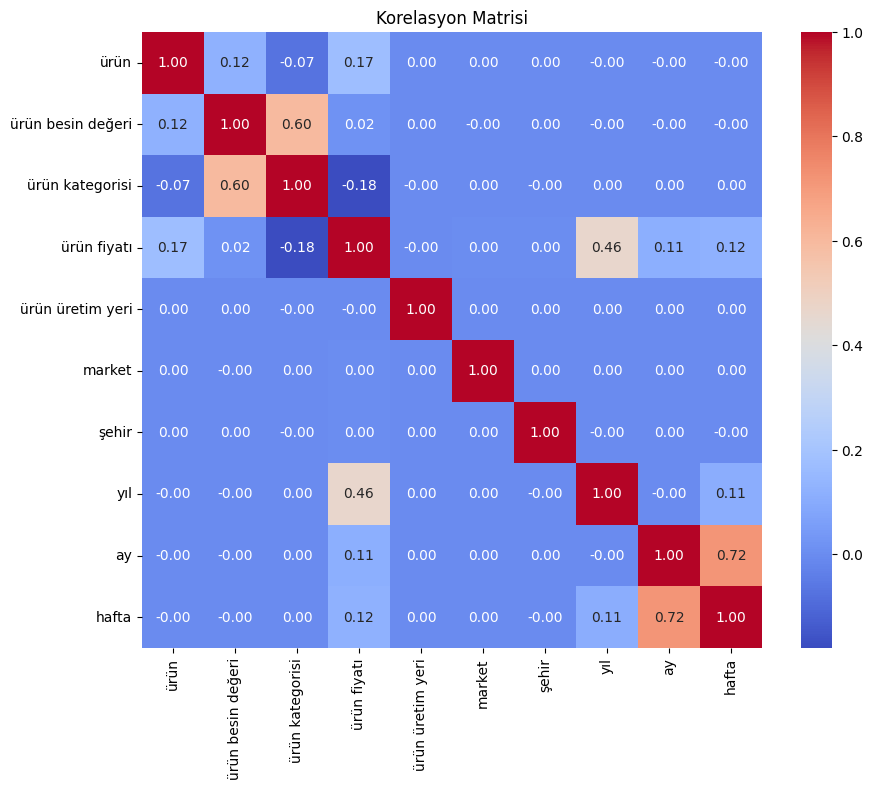

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
#sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Korelasyon Matrisi")
plt.show()


In [74]:
# Sadece sayısal sütunlar
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

# Ürün fiyatı ile korelasyonu olanları hesapla
correlations = train_df[numeric_cols].corr()["ürün fiyatı"]

# |korelasyon| < 0.01 olan sütunları al
low_corr_features = correlations[abs(correlations) < 0.01].index.tolist()
print("Düşük korelasyonlu sütunlar:", low_corr_features)


Düşük korelasyonlu sütunlar: ['ürün üretim yeri', 'market', 'şehir']


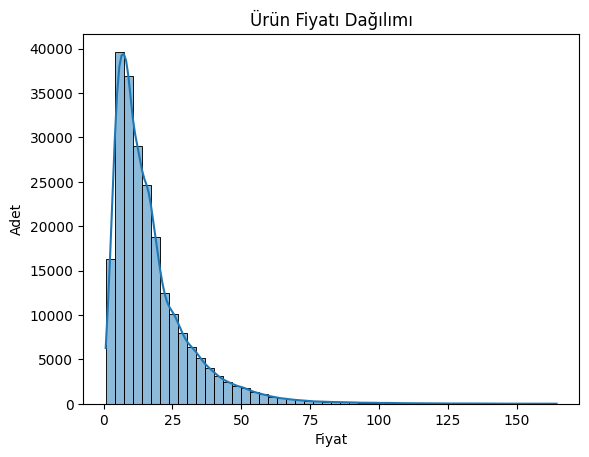

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df["ürün fiyatı"], bins=50, kde=True)
plt.title("Ürün Fiyatı Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Adet")
plt.show()


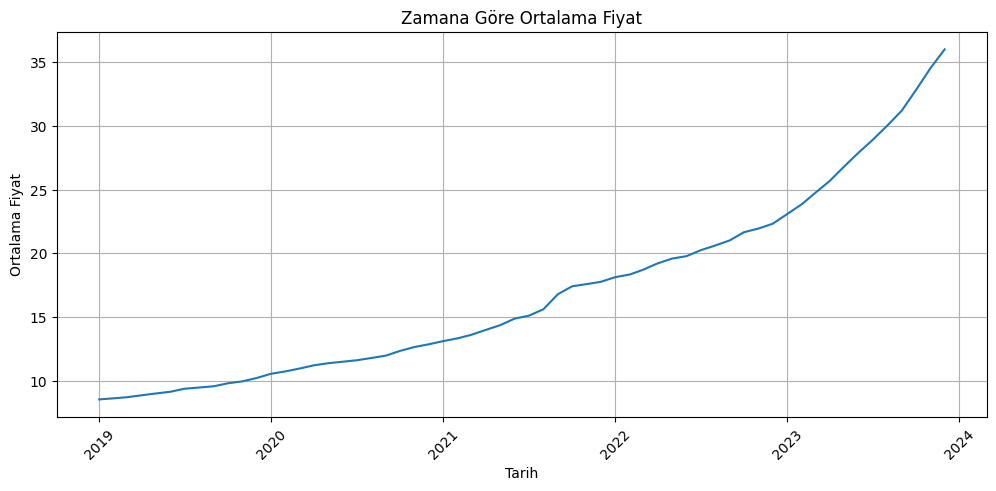

In [76]:
df_temp = train_df.groupby("tarih")["ürün fiyatı"].mean().reset_index()
plt.figure(figsize=(12, 5))
plt.plot(df_temp["tarih"], df_temp["ürün fiyatı"])
plt.title("Zamana Göre Ortalama Fiyat")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [77]:
y = train_df["ürün fiyatı"]
X = train_df.drop(columns=["tarih", "ürün fiyatı"])


In [79]:
X = X.drop(columns=low_corr_features)

In [80]:
X

,ürün,ürün besin değeri,ürün kategorisi,yıl,ay,hafta
0,65,120,0,2019,1,1
1,70,103,0,2019,1,1
2,61,160,0,2019,1,1
3,1,354,3,2019,1,1
4,2,72,3,2019,1,1
...,...,...,...,...,...,...
227515,59,110,1,2023,12,48
227516,60,115,1,2023,12,48
227517,62,100,1,2023,12,48
227518,55,110,1,2023,12,48
